In [48]:
!pip install sentence_transformers

In [49]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
reviews = pd.read_csv('/content/RElectronics_df.csv')
reviews.groupby('LABEL')
reviews.head(5)

index  Unnamed: 0  DOC_ID       LABEL  RATING VERIFIED_PURCHASE  \
0      0          15      16  __label1__       4                 N   
1      1         103     104  __label1__       4                 N   
2      2         144     145  __label1__       2                 N   
3      3         150     151  __label1__       4                 N   
4      4         187     188  __label1__       4                 N   

  PRODUCT_CATEGORY  PRODUCT_ID  \
0      Electronics  B004WODP20   
1      Electronics  B0077V8930   
2      Electronics  B0007N55NM   
3      Electronics  B008DS0XYE   
4      Electronics  B004JRYLG4   

                                       PRODUCT_TITLE  \
0  Sony MDRZX100  ZX Series Stereo Headphones (Bl...   
1  Onkyo TX-SR313 5.1- Channel Home Theater A/V R...   
2  Sony MDR-XD100 Stereo Headphones (Discontinued...   
3  Beats Solo HD On-Ear Headphone (White) (Discon...   
4  JVC HAS160B FLATS Lightweight Headband Headpho...   

                        REVIEW_TITLE  \
0                    Price is right!   
1                 good for the price   
2  Didn't meet up to my expectations   
3                    Paying for name   
4                 What a great deal!   

                                         REVIEW_TEXT  
0  wonderful headphones had them now for 5 months...  
1  For the price, this is a pretty good receiver,...  
2  I bought these things after reading allot of g...  
3  These are good headphones but you are paying m...  
4  The headset has worked great in my household. ...

In [52]:
df=reviews['LABEL']
label=list(df)
label_1=[]
label_2=[]
for i in range(0,700):
    if label[i]=='__label1__':
        label_1.append(label[i])
    else:
        label_2.append(label[i])



In [53]:
sentences = reviews['REVIEW_TEXT']

In [54]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [55]:
sentence_vecs = model.encode(sentences)

In [56]:
arr=cosine_similarity(sentence_vecs,sentence_vecs)

In [57]:
node_1 = []
node_2 = []
for u in range(0,700) :
    for v in range(0,700) :
        if u!=v and arr[u,v]>0.75:
            node_1.append(reviews['REVIEW_TITLE'].loc[u])
            node_2.append(reviews['REVIEW_TITLE'].loc[v])
        else:
            node_1.append(reviews['REVIEW_TITLE'].loc[u])
            node_2.append(1)

In [58]:
df = pd.DataFrame(list(zip(node_1, node_2)),
               columns =['Column1', 'Column2'])
df

Column1 Column2
0         Price is right!       1
1         Price is right!       1
2         Price is right!       1
3         Price is right!       1
4         Price is right!       1
...                   ...     ...
489995  works as expected       1
489996  works as expected       1
489997  works as expected       1
489998  works as expected       1
489999  works as expected       1

[490000 rows x 2 columns]

In [59]:
import networkx as nx
G = nx.Graph()
import matplotlib.pyplot as plt

In [60]:
G = nx.from_pandas_edgelist(df, 'Column1', 'Column2')

In [61]:
G.remove_node(1)

In [62]:
nx.info(G)
num=G.number_of_nodes()

In [63]:
degrees1 = {node:val for (node, val) in G.degree()}
x= list(degrees1.keys())
val= list(degrees1.values())

In [67]:
li1=[]
li2=[]
for i in range(num):
    temp=0
    for j in range(700):
        if x[i]==reviews['REVIEW_TITLE'].iloc[j]:
            temp=reviews.iloc[j]['LABEL']
    if temp=='__label1__':
        li1.append('red')
    else:
        li2.append('green')

c=li1 + li2
len(c)

680

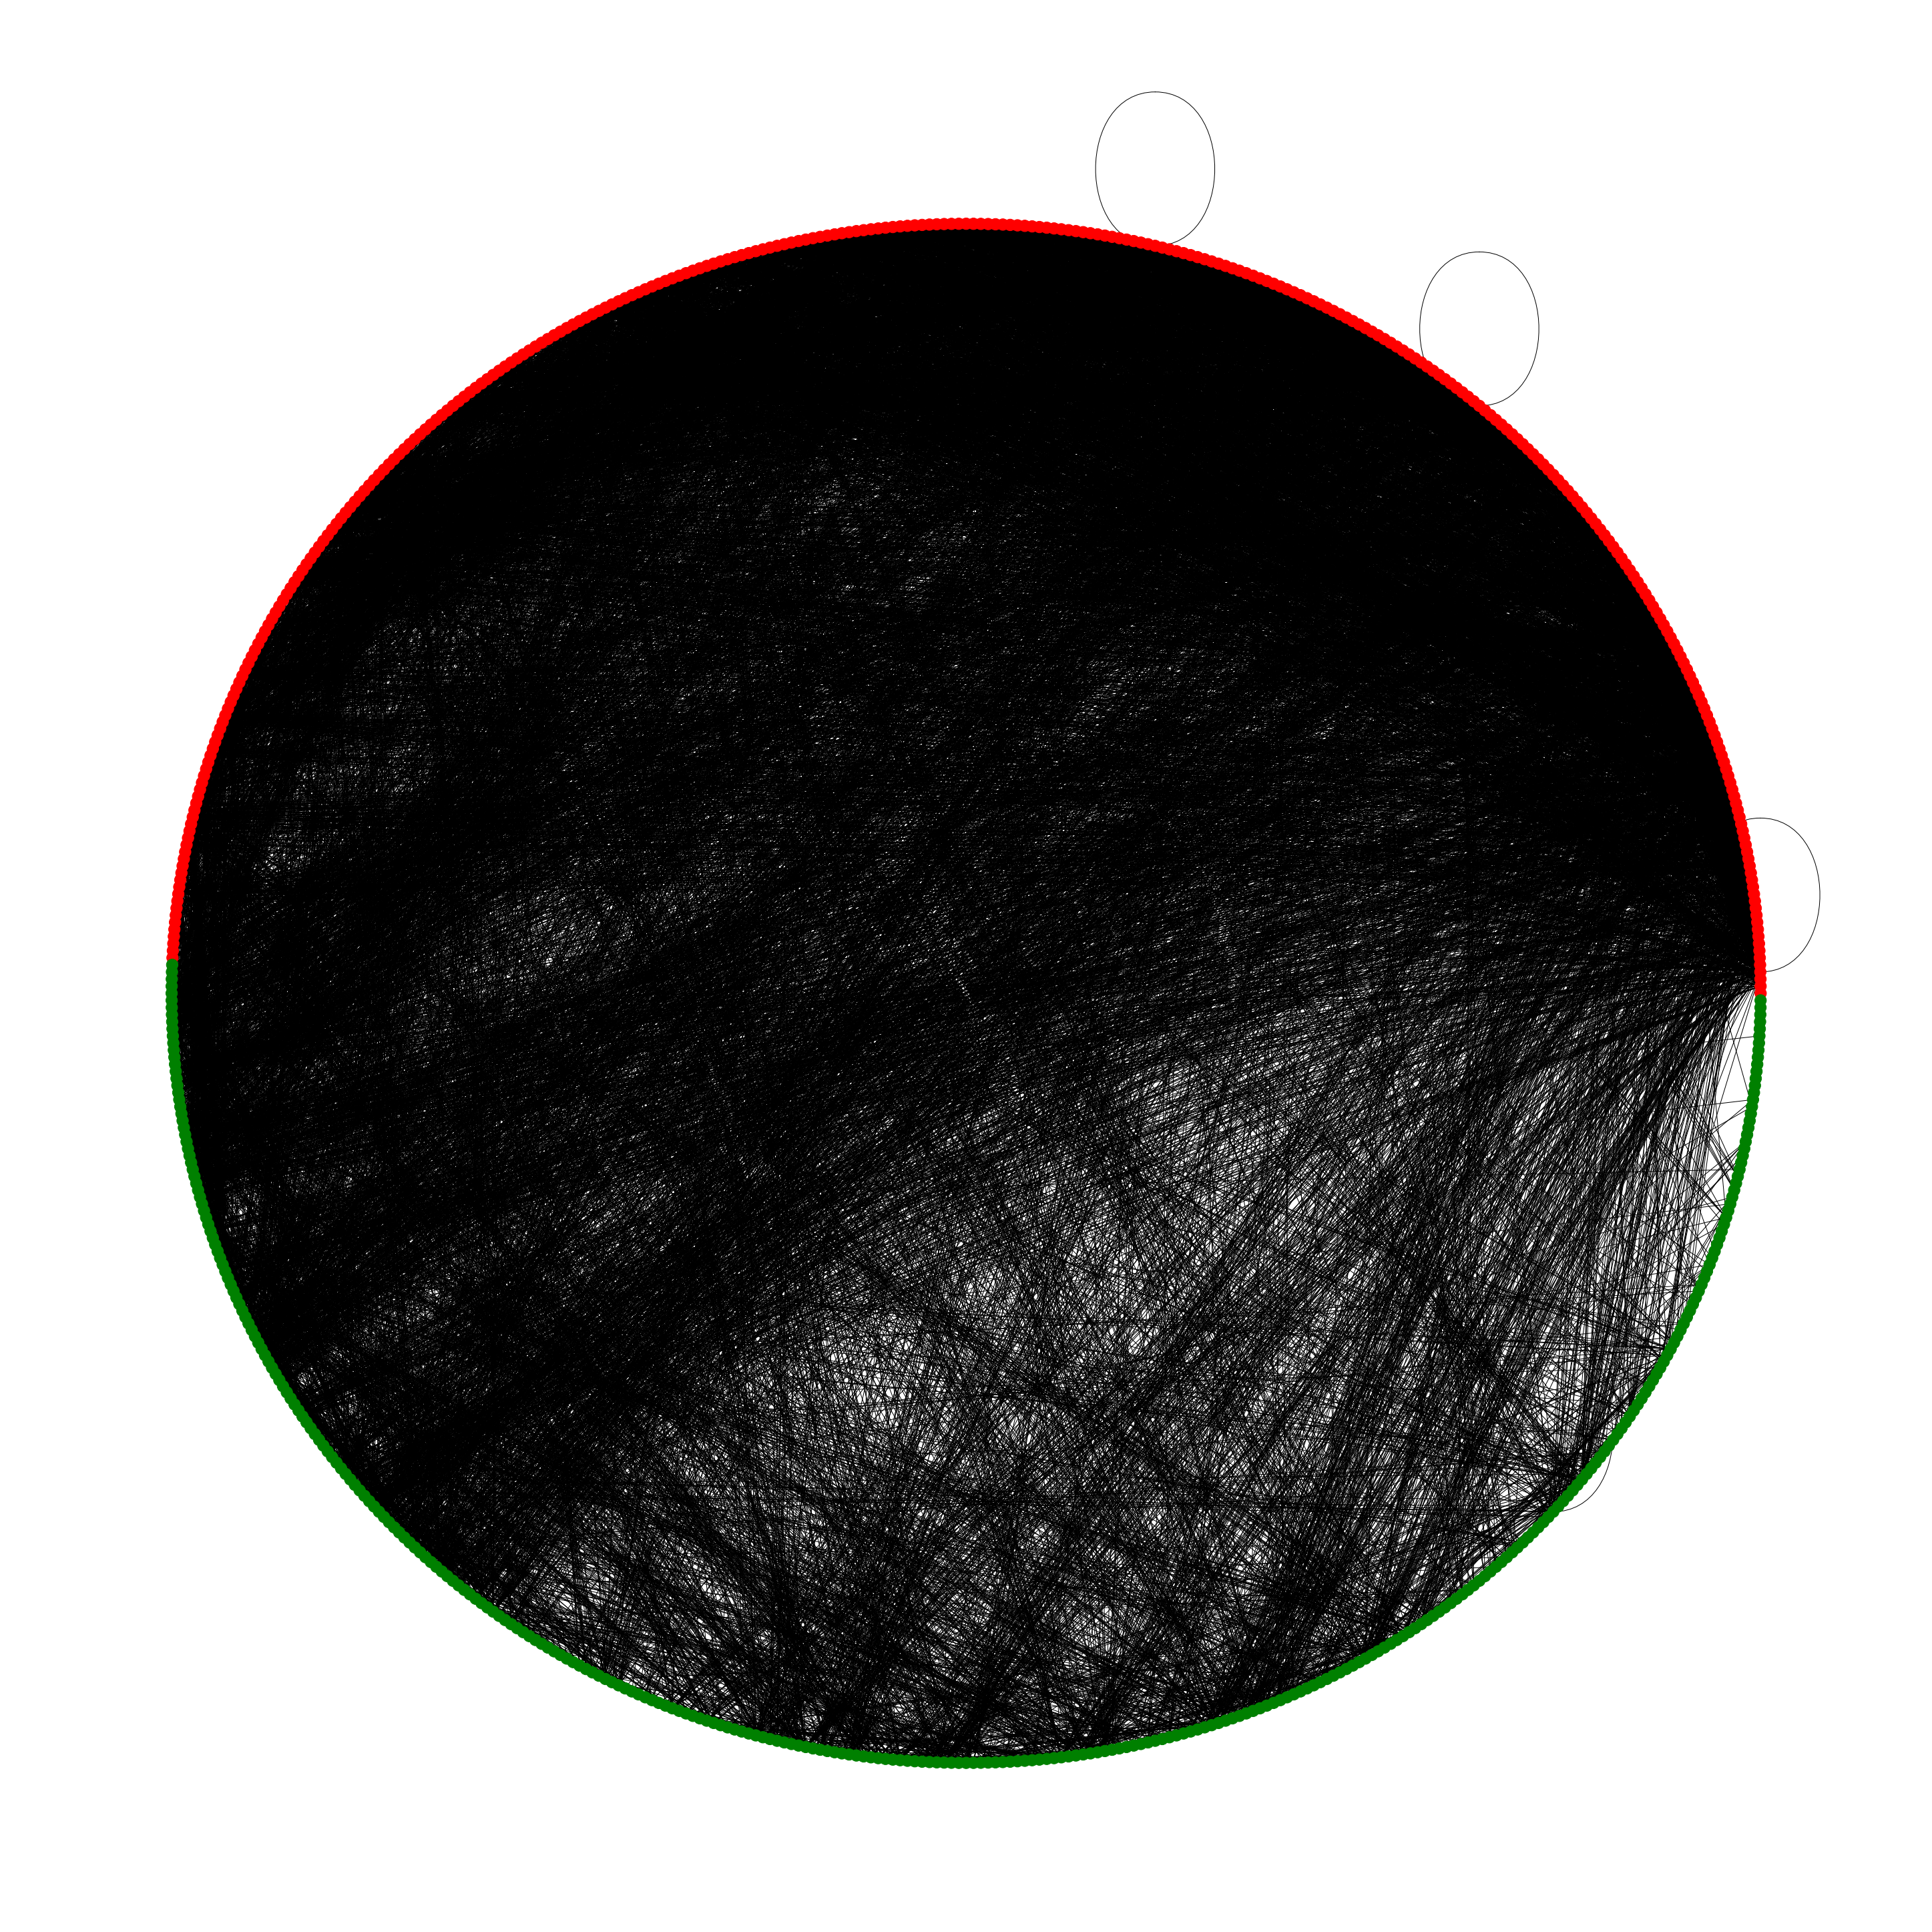

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [75]:
from matplotlib.pyplot import figure
figure(figsize=(40,40))
nx.draw_circular(G,node_color=c)
plt.show()
plt.savefig("ECcommonGraph_0.75.jpg")
plt.savefig("ECcommonGraph_0.75.png", format="PNG")
nx.write_gml(G,'ECcommonGraph_0.75.gml')
from google.colab import files
files.download('ECcommonGraph_0.75.png')


In [69]:
nx.density(G)

0.05608160790089232

In [70]:
nx.number_connected_components(G)

37

In [72]:
real=list(dict(G.degree()).values())
from statistics import mean
mean(real)

38.07941176470588

In [73]:
nx.average_clustering(G)

0.45854720695308504

In [74]:
nx.transitivity(G)

0.3776561233675996